<a href="https://colab.research.google.com/github/cather1n/Aviation-dataset/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_2_%D0%A1%D1%82%D0%B5%D0%BF%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0_%D0%95_%D0%9D_PyCaret_25_%D0%BC%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jinja2

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
from google.colab import drive # Подключение диска
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/df1.xlsx") # Загрузка данных

NameError: ignored

In [ ]:
columns = ['Injury.Severity.Type', 'Unnamed: 0', 'TopMake', 'Phases']
df2 = df2.drop(columns, axis=1)
df2.head()

,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight
0,Destroyed,Airplane,Stinson,1,Reciprocating,Unknown,Cruise
1,Destroyed,Airplane,Piper,1,Reciprocating,Unknown,Unknown
2,Destroyed,Airplane,Cessna,1,Reciprocating,IMC,Cruise
3,Destroyed,Airplane,Rockwell,1,Reciprocating,IMC,Cruise
4,Destroyed,Airplane,Cessna,Unknown,Unknown,VMC,Approach


In [ ]:
df2

,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight
0,Destroyed,Airplane,Stinson,1,Reciprocating,Unknown,Cruise
1,Destroyed,Airplane,Piper,1,Reciprocating,Unknown,Unknown
2,Destroyed,Airplane,Cessna,1,Reciprocating,IMC,Cruise
3,Destroyed,Airplane,Rockwell,1,Reciprocating,IMC,Cruise
4,Destroyed,Airplane,Cessna,Unknown,Unknown,VMC,Approach
...,...,...,...,...,...,...,...
65950,Destroyed,Airplane,CIRRUS DESIGN CORP,1,Unknown,Unknown,Unknown
65951,Unknown,Airplane,Cessna,Unknown,Unknown,Unknown,Unknown
65952,Unknown,Airplane,Cessna,Unknown,Unknown,Unknown,Unknown
65953,Unknown,Airplane,Cessna,Unknown,Unknown,Unknown,Unknown


In [ ]:
# Выбираем из датасета 95% данных для дальнейшего моделирования
df2_dm = df2.sample(frac=0.95,random_state=1)
# Выбираем из датасета 5% данных для предсказаний
df2_dm_unseen = df2.drop(df2_dm.index)
# Обновляем индексы
df2_dm.reset_index(inplace=True, drop=True)
df2_dm_unseen.reset_index(inplace=True, drop=True)

print('Исходные данные: ' + str(df2.shape))
print('Данные для моделирования: ' + str(df2_dm.shape))
print('Данные для предсказаний: ' + str(df2_dm_unseen.shape))

df2_dm

Исходные данные: (65955, 7)
Данные для моделирования: (62657, 7)
Данные для предсказаний: (3298, 7)


,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight
0,Substantial,Airplane,Cessna,Unknown,Unknown,Unknown,Unknown
1,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Takeoff
2,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Unknown
3,Substantial,Airplane,Mooney,1,Reciprocating,VMC,Landing
4,Unknown,Airplane,Boeing,2,Turbo Fan,VMC,Unknown
...,...,...,...,...,...,...,...
62652,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Takeoff
62653,Substantial,Airplane,Lockheed,4,Turbo Prop,VMC,Climb
62654,Destroyed,Airplane,Beech,1,Reciprocating,IMC,Cruise
62655,Substantial,Airplane,Champion,1,Reciprocating,VMC,Maneuvering


In [ ]:
df2_dm_unseen

,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight
0,Destroyed,Airplane,Cessna,1,Reciprocating,VMC,Unknown
1,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Approach
2,Destroyed,Airplane,Piper,1,Reciprocating,VMC,Cruise
3,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Landing
4,Destroyed,Airplane,Piper,2,Reciprocating,IMC,Takeoff
...,...,...,...,...,...,...,...
3293,Substantial,Airplane,Cessna,1,Unknown,Unknown,Unknown
3294,Substantial,Airplane,Cessna,1,Unknown,VMC,Unknown
3295,Substantial,Airplane,Beech,1,Unknown,VMC,Unknown
3296,Minor,Airplane,Boeing,2,Unknown,Unknown,Unknown


In [ ]:
#Включаем среду Colab
#from pycaret.utils import enable_colab
#enable_colab()
#Настраиваем модели машинного обучения. Исключаем целевой параметр - 'Aircraft.damage',  


Colab mode enabled.


In [ ]:
numeric_features = df2.select_dtypes('number') # Выделяем категориальные признаки
categorical_features = df2.select_dtypes('object')
print(numeric_features.columns)
print(categorical_features.columns)

Index([], dtype='object')
Index(['Aircraft.damage', 'Aircraft.Category', 'Make', 'Number.of.Engines',
       'Engine.Type', 'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')


In [ ]:
exp_clf101 =setup(df2_dm, target = 'Aircraft.damage',session_id=543,
                  normalize = True, transformation = True,
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  log_experiment = True,
            silent=True,
            categorical_features=['Aircraft.Category', 'Make', 'Number.of.Engines',
       'Engine.Type', 'Weather.Condition', 'Broad.phase.of.flight']
            )

,Description,Value
0,session_id,543
1,Target,Aircraft.damage
2,Target Type,Multiclass
3,Label Encoded,"Destroyed: 0, Minor: 1, Substantial: 2, Unknow..."
4,Original Data,"(62657, 7)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models(sort='F1') #Сравниваем модели по метрике F1

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7670,0.8056,0.4867,0.7432,0.7313,0.3477,0.3809,1.928
et,Extra Trees Classifier,0.7609,0.7888,0.4787,0.7327,0.7280,0.3396,0.3662,5.944
dt,Decision Tree Classifier,0.7602,0.7822,0.4790,0.7321,0.7278,0.3393,0.3652,0.277
rf,Random Forest Classifier,0.7623,0.7956,0.4766,0.7352,0.7272,0.3378,0.3677,4.562
lr,Logistic Regression,0.7629,0.7992,0.4732,0.7351,0.7248,0.3331,0.3663,8.831
lda,Linear Discriminant Analysis,0.7535,0.7909,0.4917,0.7286,0.7244,0.3395,0.3592,0.764
gbc,Gradient Boosting Classifier,0.7635,0.8030,0.4713,0.7373,0.7242,0.3309,0.3669,21.660
ada,Ada Boost Classifier,0.7591,0.7489,0.4662,0.7298,0.7200,0.3221,0.3547,1.651
ridge,Ridge Classifier,0.7595,0.0000,0.4531,0.7278,0.7195,0.3184,0.3522,0.089
svm,SVM - Linear Kernel,0.7520,0.0000,0.4427,0.7171,0.7090,0.2898,0.3248,0.909


lightgbm, et и dt - являются самыми лучшими моделями.


In [ ]:
# Перекрестная проверка
lightgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7669,0.8107,0.4903,0.7441,0.7311,0.3495,0.3822
1,0.7671,0.8099,0.4896,0.7424,0.7296,0.3449,0.3794
2,0.7639,0.7989,0.4684,0.7375,0.7279,0.3369,0.3694
3,0.7664,0.8024,0.4890,0.7431,0.7323,0.3499,0.3810
4,0.7675,0.8048,0.4785,0.7448,0.7308,0.3449,0.3800
Mean,0.7664,0.8053,0.4832,0.7424,0.7303,0.3452,0.3784
Std,0.0013,0.0045,0.0086,0.0026,0.0015,0.0047,0.0046


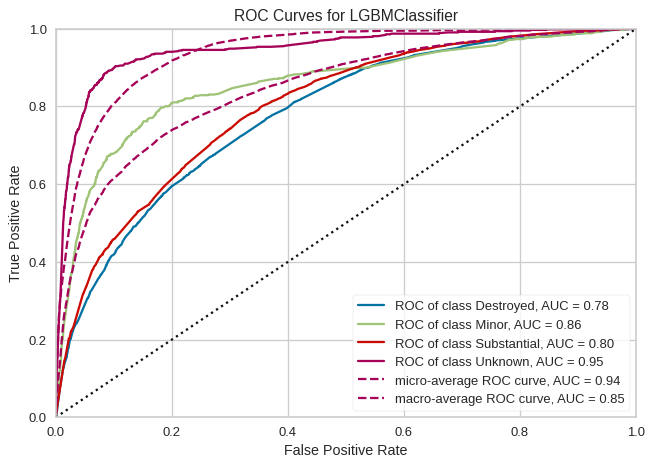

In [ ]:
plot_model(lightgbm,scale=1.3)

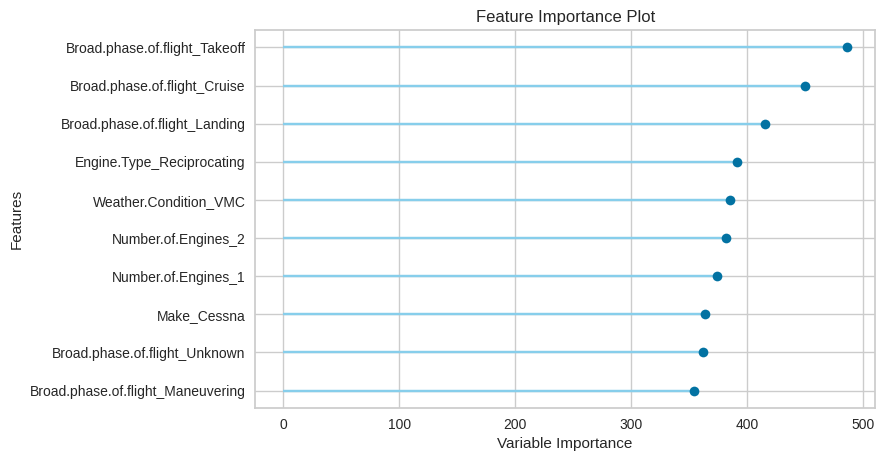

In [ ]:
plot_model(lightgbm, plot = 'feature') # График, показывающий наиболее значимые параметры для модели.

In [ ]:
# настройка гиперпараметров
tuned_lightgbm= tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7677,0.8133,0.5051,0.7440,0.7350,0.3610,0.3890
1,0.7684,0.8085,0.4878,0.7468,0.7302,0.3448,0.3826
2,0.7642,0.8098,0.4778,0.7361,0.7277,0.3424,0.3734
3,0.7670,0.8094,0.5050,0.7416,0.7285,0.3462,0.3808
4,0.7620,0.7966,0.4589,0.7349,0.7240,0.3276,0.3617
5,0.7656,0.8006,0.4767,0.7413,0.7294,0.3434,0.3760
6,0.7654,0.8018,0.4944,0.7420,0.7293,0.3460,0.3783
7,0.7658,0.8024,0.4938,0.7405,0.7294,0.3431,0.3761
8,0.7674,0.8055,0.4682,0.7441,0.7305,0.3442,0.3796


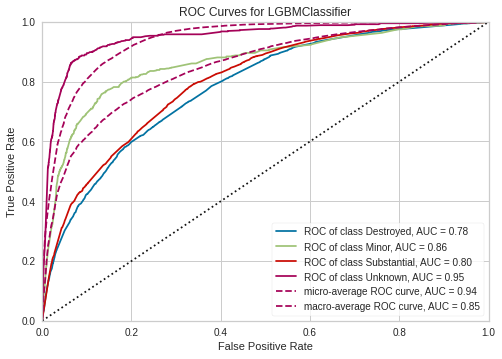

In [ ]:
plot_model(tuned_lightgbm)

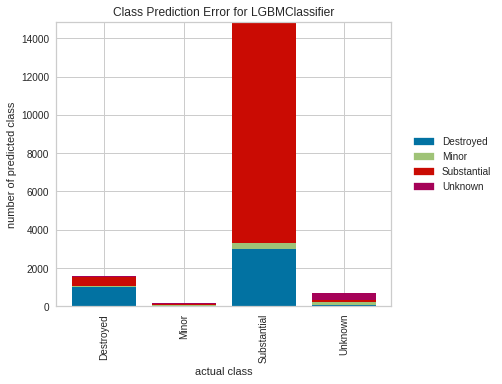

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

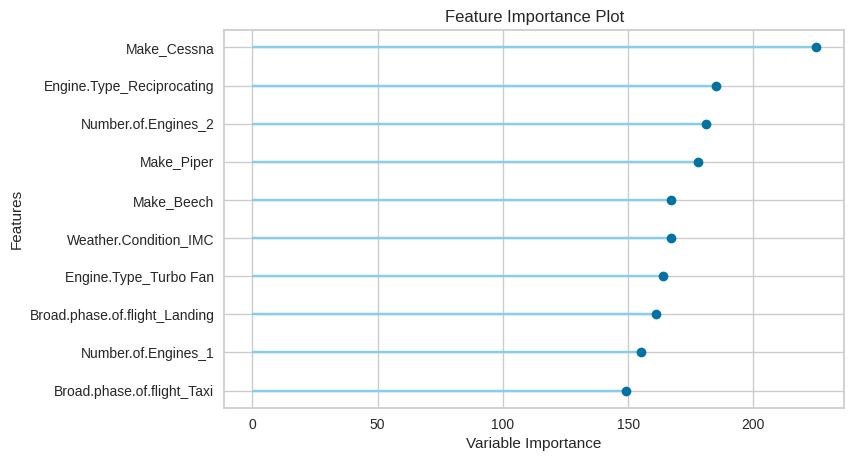

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
final_lightgbm = finalize_model(lightgbm) # Определение финальной модели

In [ ]:
save_model(final_lightgbm,'Final lightgbm Model 25May')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Aircraft.Category',
                                                             'Make',
                                                             'Number.of.Engines',
                                                             'Engine.Type',
                                                             'Weather.Condition',
                                                             'Broad.phase.of.flight'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Aircraft.damage',
                                       time_features=[])),
                 ('imputer',
                  Simpl...
                  LGBMClass

In [ ]:
saved_final_lightgbm= load_model('Final lightgbm Model 25May')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_lightgbm, data=df2_dm_unseen) #Делаем предсказание на 5% данных, не участвовавших в машинном обучении

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.0,0.8079,0,0,0,0,0


In [ ]:
df2_dm_unseen

,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight
0,Destroyed,Airplane,Cessna,1,Reciprocating,VMC,Unknown
1,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Approach
2,Destroyed,Airplane,Piper,1,Reciprocating,VMC,Cruise
3,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Landing
4,Destroyed,Airplane,Piper,2,Reciprocating,IMC,Takeoff
...,...,...,...,...,...,...,...
3293,Substantial,Airplane,Cessna,1,Unknown,Unknown,Unknown
3294,Substantial,Airplane,Cessna,1,Unknown,VMC,Unknown
3295,Substantial,Airplane,Beech,1,Unknown,VMC,Unknown
3296,Minor,Airplane,Boeing,2,Unknown,Unknown,Unknown


In [ ]:
new_prediction.head()

,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight,Label,Score
0,Destroyed,Airplane,Cessna,1,Reciprocating,VMC,Unknown,Substantial,0.9222
1,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Approach,Substantial,0.8031
2,Destroyed,Airplane,Piper,1,Reciprocating,VMC,Cruise,Substantial,0.7312
3,Substantial,Airplane,Cessna,1,Reciprocating,VMC,Landing,Substantial,0.9549
4,Destroyed,Airplane,Piper,2,Reciprocating,IMC,Takeoff,Destroyed,0.5778


In [ ]:
from pycaret.utils import check_metric
check_metric(actual=new_prediction['Aircraft.damage'],
             prediction=new_prediction['Label'],metric='F1')

0.73

In [ ]:
new_prediction_test = predict_model(saved_final_lightgbm, data=df2_dm_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.0,0.8079,0,0,0,0,0


In [ ]:
new_prediction_test.to_csv('new_prediction_test.csv', sep = ',', index = False)

3 лучших модели Light Gradient Boosting Machine,  Extra Trees Classifier, Extra Trees Classifier.
Самая лучшая модель Light Gradient Boosting Machine. Самые значимые параметры для модели являются фаза полета Board.phase.of.flight (Takeoff, Cruise, Landing)